In [1]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

init_notebook_mode(connected=True)

In [2]:
df_points = pd.read_csv("../Data/Large/temp.csv")
df_points.head()

,Index,X_1,X_2
0,1,237,125
1,2,622,531
2,3,656,221
3,4,16,582
4,5,220,578


In [3]:
df_centroids = pd.read_csv("../Data/Large/Centroid.csv")
df_centroids.head()

,iteration,index,c_1,c_2
0,0,1,383.0,388.0
1,0,2,396.0,389.0
2,0,3,381.0,379.0
3,0,4,375.0,388.0
4,0,5,379.0,393.0


In [4]:
df_assignment = pd.read_csv("../Data/Large/assignment.csv")
df_assignment.head()

,iteration,P_i,C_j
0,0,1,1
1,0,2,2
2,0,3,3
3,0,4,4
4,0,5,5


In [5]:
df_ = pd.merge(df_assignment,df_centroids, how='inner', left_on=['iteration', 'C_j'], right_on=['iteration','index'])
df_ = pd.merge(df_,df_points, how='inner', left_on =  ['P_i'],right_on=['Index'] )
df_.head()

,iteration,P_i,C_j,index,c_1,c_2,Index,X_1,X_2
0,0,1,1,1,383.0,388.0,1,237,125
1,1,1,4,4,375.0,388.0,1,237,125
2,2,1,4,4,374.5,387.5,1,237,125
3,3,1,6,6,380.5,375.5,1,237,125
4,4,1,6,6,399.5,362.5,1,237,125


In [6]:
clusters = []
for x in df_.C_j.unique():
    clusters.append("Cluster "+ str(x))
print(clusters)

['Cluster 1', 'Cluster 4', 'Cluster 6', 'Cluster 2', 'Cluster 3', 'Cluster 7', 'Cluster 5']


In [43]:
df_.iteration.unique()

array([0, 1, 2, 3, 4])

In [8]:
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

In [9]:
iterations = df_.iteration.unique()

In [10]:
# fill in most of layout
figure['layout']['xaxis'] = {'title': 'X'}
figure['layout']['yaxis'] = {'title': 'Y'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 1000,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1',
    'plotlycommand': 'animate',
    'values': iteration,
    'visible': True
}

NameError: name 'iteration' is not defined

In [11]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

In [12]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}


In [13]:
iteration = 0
for index in df_.C_j.unique():    
    df_by_Cluster_Index_iteration = df_.loc[(df_['C_j'] == index) & (df_['iteration'] == iteration)]
    
    data_dict = {
        'x': list(df_by_Cluster_Index_iteration['X_1']),
        'y': list(df_by_Cluster_Index_iteration['X_2']),
        'mode': 'markers',
        'text': list(df_by_Cluster_Index_iteration['P_i']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 15,
        }
    }
    figure['data'].append(data_dict)

In [14]:
for iteration in iterations:
    frame = {'data': [], 'name': str(iteration)}
    for index in df_.C_j.unique():    
        df_by_Cluster_Index_iteration = df_.loc[(df_['C_j'] == index) & (df_['iteration'] == iteration)]


        data_dict = {
            'x': list(df_by_Cluster_Index_iteration['X_1']),
            'y': list(df_by_Cluster_Index_iteration['X_2']),
            'mode': 'markers',
            'text': list(df_by_Cluster_Index_iteration['P_i']),

            'marker': {
                'sizemode': 'area',
                'sizeref': 200000,
            }
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [[iteration],
        {'frame': {'duration': 500, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': iteration,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

ValueError: 
    Invalid value of type 'numpy.int64' received for the 'label' property of layout.slider.step
        Received value: 0

    The 'label' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [15]:
colors = np.array(['blue','green','red','cyan','magenta','yellow','black','orange','saddlebrown'])
df_['cluster'] = colors[df_['C_j']]
df_.head()

,iteration,P_i,C_j,index,c_1,c_2,Index,X_1,X_2,cluster
0,0,1,1,1,383.0,388.0,1,237,125,green
1,1,1,4,4,375.0,388.0,1,237,125,magenta
2,2,1,4,4,374.5,387.5,1,237,125,magenta
3,3,1,6,6,380.5,375.5,1,237,125,black
4,4,1,6,6,399.5,362.5,1,237,125,black


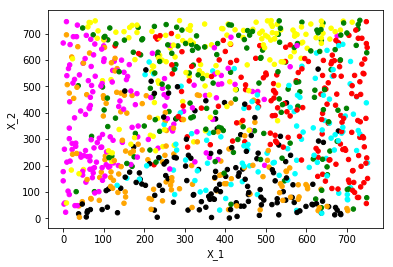

In [19]:
df_0 = df_[df_['iteration']==4]
plot2 = df_0.plot.scatter(x='X_1',y='X_2',c=df_0.cluster.values)


In [17]:

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

import pandas as pd

init_notebook_mode(connected=True)

url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
#dataset = pd.read_csv(url)

years = [0,1,2,3,4]
# make list of continents
continents = list(range(1,8))
# for continent in dataset['continent']:
#     if continent not in continents:
#         continents.append(continent)
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 800], 'title': 'Life Expectancy'}
figure['layout']['yaxis'] = {'title': 'GDP per Capita'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 300,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1952',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = 0
for continent in continents:
    dataset_by_year = df_[df_['iteration'] == year]
    dataset_by_year_and_cont = dataset_by_year[df_['C_j'] == continent]

    data_dict = {
        'x': list(dataset_by_year_and_cont['X_1']),
        'y': list(dataset_by_year_and_cont['X_2']),
        'mode': 'markers',
        'text': list(dataset_by_year_and_cont['P_i']),
        'name': continent
    }
    figure['data'].append(data_dict)
    
# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for continent in continents:
        dataset_by_year = df_[df_['iteration'] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['C_j'] == continent]
        
        data_dict = {
            'x': list(dataset_by_year_and_cont['X_1']),
            'y': list(dataset_by_year_and_cont['X_2']),
            'mode': 'markers',
            'marker':{
                'size':5
            },

            'text': list(dataset_by_year_and_cont['P_i']),
            'name': continent
        }
        frame['data'].append(data_dict)
        
        df_temp = df_centroids.loc[(df_centroids['index'] == continent) & (df_centroids['iteration'] == int(year))]
        data_centroids = {
            'x': list(df_temp['c_1']),
            'y': list(df_temp['c_2']),
            
            'mode': 'markers',
            'marker':{
                'size':60,
                'color':'rgb(0,0,0)',

                'line':{
                    'color':'rgb(0,0,0)',
                    'width':20 
                }
            },
            'text': 'Centroid',
            'name': continent
        }
        frame['data'].append(data_centroids)


    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 3, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

/home/wongaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [18]:
iplot(figure)

In [ ]:
print(list( range(1,8)))